In [25]:
import mplfinance as mpf
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hagamos una visualizacion financiera de la empresa Starbucks

### Veremos a traves de un grafico de velas, la informacion referente al cierre en Nasdaq , desde el 01-01-2016 al 01-01-2024

Debido a que Dunkin' Brands Group, Inc. (conocida por sus marcas Dunkin' Donuts y Baskin-Robbins) dejó de cotizar en el NASDAQ el 15 de diciembre de 2020, la data anterior a la fecha no existe en canales oficiales o regulares de Nasdaq

In [3]:
# Carga el archivo .parquet en un DataFrame de Pandas
df_nasdaq_starbucks = pd.read_parquet('..//data//starbucks_nasdaq_data.parquet')

In [ ]:
# Crear el gráfico de velas
mpf.plot(df_nasdaq_starbucks, type='candle', style='charles', volume=True, title='Gráfico de Velas', ylabel='Precio', ylabel_lower='Volumen')

c:\Users\jhcat\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


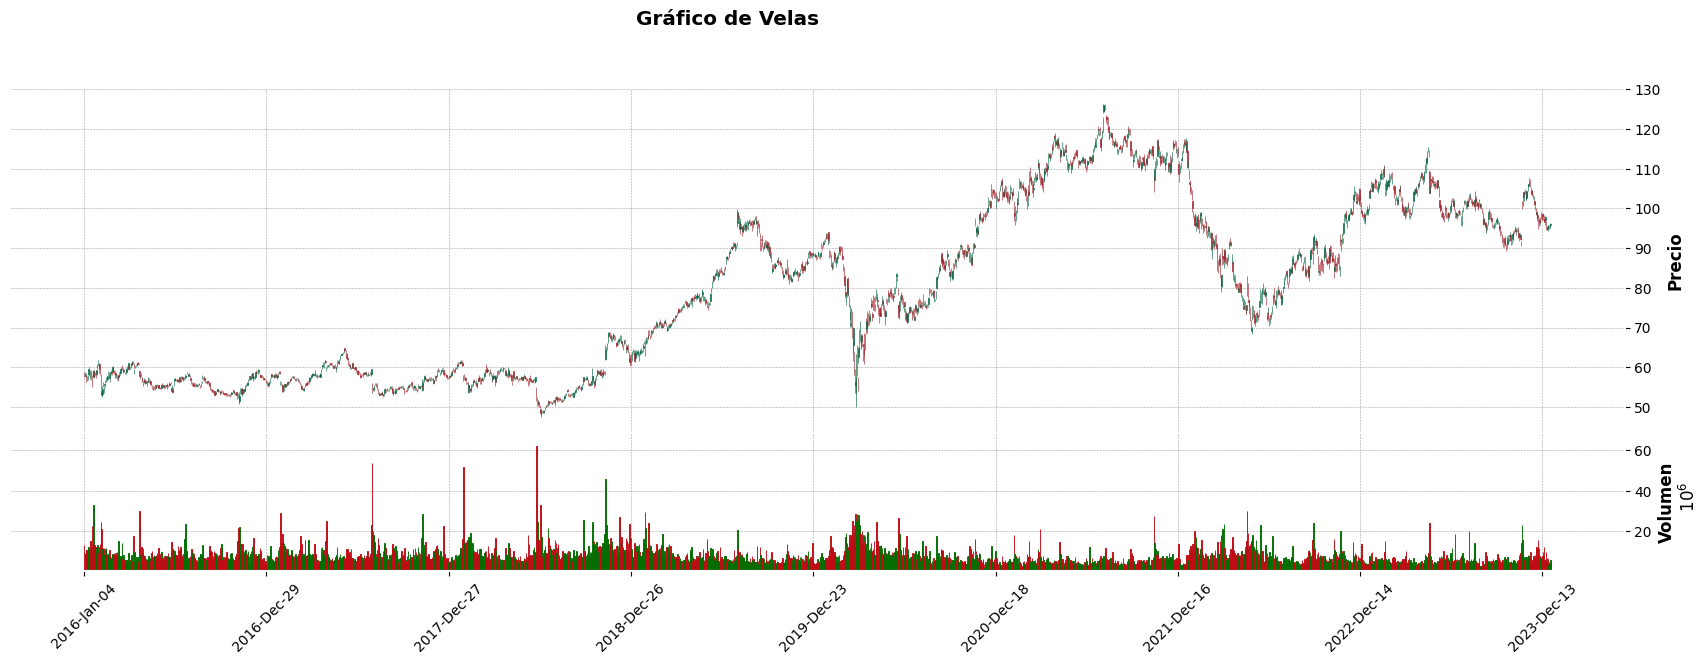

In [6]:
# Ajustar el tamaño del gráfico
figratio = (26, 8)  # Proporción de la figura (ancho, alto)
figscale = 1.2  # Escala del tamaño general de la figura

mpf.plot(df_nasdaq_starbucks, 
         type='candle', 
         style='charles', 
         volume=True, 
         title='Gráfico de Velas', 
         ylabel='Precio', 
         ylabel_lower='Volumen', 
         figratio=figratio, 
         figscale=figscale)

# Hagamos una comparativa de Numero de Reviews x Estado, tanto para Starbucks como para su competidor (Dunkin), considerando discriminar por tipo de Review

### Reviews de Starbucks por Estado

In [26]:
# Cargar los archivos Parquet
df_business = pd.read_parquet('..//data//business.parquet')
df_review_sent_total = pd.read_parquet('..//data//review_sent_total.parquet')

# Unir los DataFrames en la columna business_id
df_merged = pd.merge(df_business, df_review_sent_total, on='business_id')

# Agrupar por 'state' y sumar las columnas 'positive_total', 'neutral_total', 'negative_total'
df_grouped = df_merged.groupby('state')[['positive_total', 'neutral_total', 'negative_total']].sum().reset_index()

# Calcular la columna 'total_reviews' como la suma de 'positive_total', 'neutral_total' y 'negative_total'
df_grouped['total_reviews'] = df_grouped['positive_total'] + df_grouped['neutral_total'] + df_grouped['negative_total']

# Ordenar el DataFrame por 'total_reviews' de mayor a menor
df_grouped = df_grouped.sort_values(by='total_reviews', ascending=False)

# Definir los colores para las columnas
colors = ['#006847', '#22382E', '#000000']

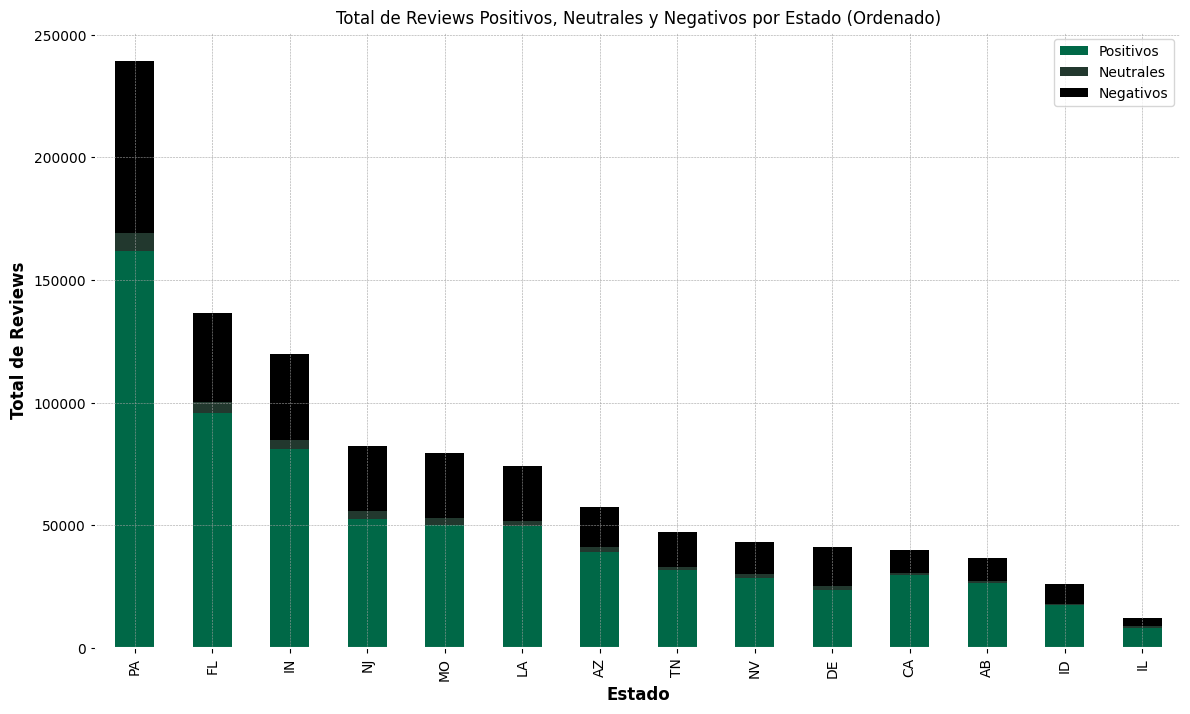

In [27]:
# Crear el gráfico de columnas apiladas
fig, ax = plt.subplots(figsize=(14, 8))

# Crear las columnas apiladas ordenadas
df_grouped.set_index('state')[['positive_total', 'neutral_total', 'negative_total']].plot(kind='bar', stacked=True, color=colors, ax=ax)

# Personalizar el gráfico
plt.title('Total de Reviews Positivos, Neutrales y Negativos por Estado (Ordenado)')
plt.xlabel('Estado')
plt.ylabel('Total de Reviews')
plt.legend(['Positivos', 'Neutrales', 'Negativos'])

# Mostrar el gráfico
plt.show()

### Reviews de Dunkin por Estado

In [17]:
# Cargar los archivos Parquet
df_business_dunkin = pd.read_parquet('..//data//business_dunkin.parquet')
df_review_dunkin__sent_total = pd.read_parquet('..//data//review_dunkin_sent_total.parquet')

# Unir los DataFrames en la columna business_id
df_merged = pd.merge(df_business_dunkin, df_review_dunkin__sent_total, on='business_id')

# Agrupar por 'state' y sumar las columnas 'positive_total', 'neutral_total', 'negative_total'
df_grouped = df_merged.groupby('state')[['positive_total', 'neutral_total', 'negative_total']].sum().reset_index()

# Calcular la columna 'total_reviews' como la suma de 'positive_total', 'neutral_total' y 'negative_total'
df_grouped['total_reviews'] = df_grouped['positive_total'] + df_grouped['neutral_total'] + df_grouped['negative_total']

# Ordenar el DataFrame por 'total_reviews' de mayor a menor
df_grouped = df_grouped.sort_values(by='total_reviews', ascending=False)

# Definir los colores para las columnas
colors = ['#ED5A24', '#DCDCDC', '#E64176']

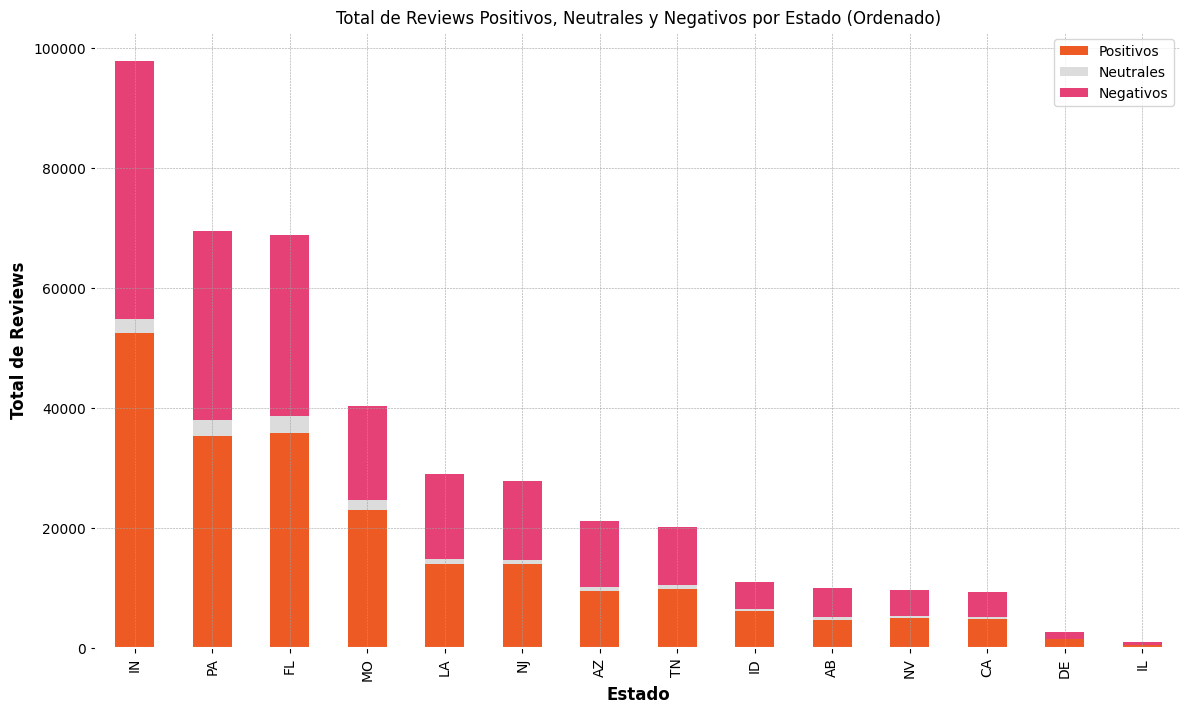

In [18]:
# Crear el gráfico de columnas apiladas
fig, ax = plt.subplots(figsize=(14, 8))

# Crear las columnas apiladas ordenadas
df_grouped.set_index('state')[['positive_total', 'neutral_total', 'negative_total']].plot(kind='bar', stacked=True, color=colors, ax=ax)

# Personalizar el gráfico
plt.title('Total de Reviews Positivos, Neutrales y Negativos por Estado (Ordenado)')
plt.xlabel('Estado')
plt.ylabel('Total de Reviews')
plt.legend(['Positivos', 'Neutrales', 'Negativos'])

# Mostrar el gráfico
plt.show()

### Visualizar Distribución de los Reviews para Starbucks

In [28]:
# Cargar el archivo Parquet
df_review_sent_total = pd.read_parquet('..//data//review_sent_total.parquet')

# Definir los colores
colors = ['#006847', '#22382E', '#000000']

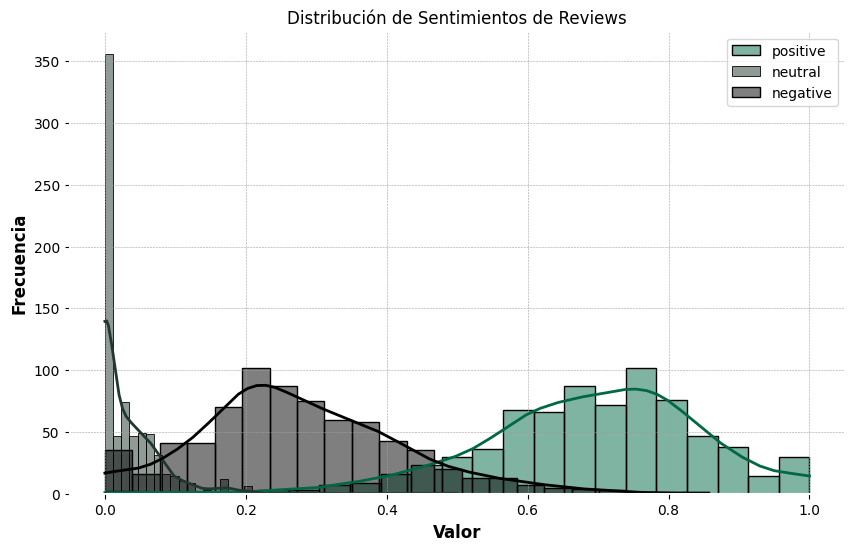

In [29]:
# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
for i, col in enumerate(['positive', 'neutral', 'negative']):
    sns.histplot(df_review_sent_total[col], color=colors[i], label=col, kde=True)

# Personalizar el gráfico
plt.title('Distribución de Sentimientos de Reviews')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

### Visualizar Distribución de los Reviews para Dunkin

In [30]:
# Cargar el archivo Parquet
df_review_sent_total = pd.read_parquet('..//data//review_dunkin_sent_total.parquet')

# Definir los colores
colors = ['#ED5A24', '#DCDCDC', '#E64176']

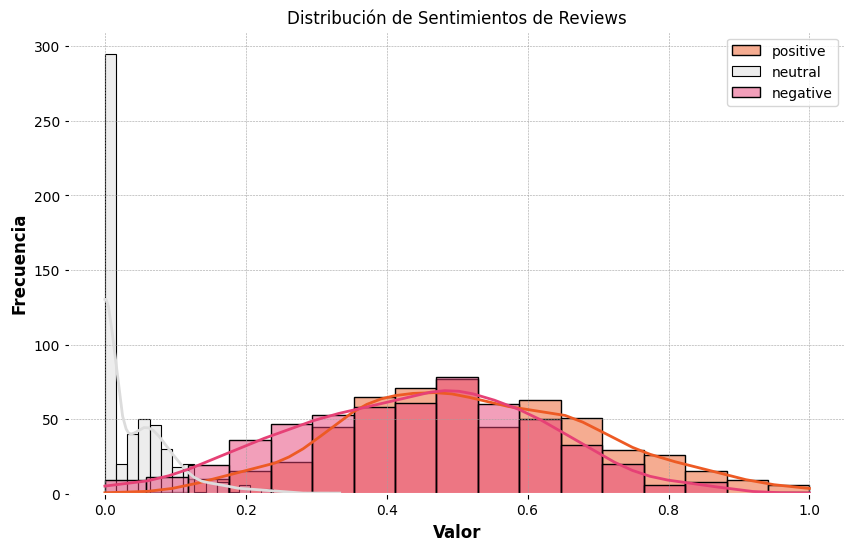

In [31]:
# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
for i, col in enumerate(['positive', 'neutral', 'negative']):
    sns.histplot(df_review_sent_total[col], color=colors[i], label=col, kde=True)

# Personalizar el gráfico
plt.title('Distribución de Sentimientos de Reviews')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

# Definir la relación entre número de Reviews totales y la cantidad de locales por Estado

### Los siguientes graficos nos representan, la cantidad de Reviews positivos de un Estado dividido entre el número total de locales en ese mismo Estado

Este grafico representa los Reviews Positivos Absolutos - Relación para Starbucks

In [34]:
# Cargar los archivos Parquet
df_business = pd.read_parquet('..//data//business.parquet')
df_review_sent_total = pd.read_parquet('..//data//review_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged = pd.merge(df_business, df_review_sent_total, on='business_id')

# Calcular la cantidad promedio de reviews positivos por negocio en cada estado
df_merged['avg_positive_per_business'] = df_merged['positive_total'] / df_merged.groupby('state')['business_id'].transform('nunique')

# Agrupar por estado y calcular el promedio de reviews positivos
df_state_avg_positive = df_merged.groupby('state')['avg_positive_per_business'].mean().reset_index()

# Ordenar los estados de mayor a menor según el promedio de reviews positivos
df_state_avg_positive = df_state_avg_positive.sort_values(by='avg_positive_per_business', ascending=False)

# Definir los colores para el gráfico
colors = ['#006847', '#22382E', '#000000']

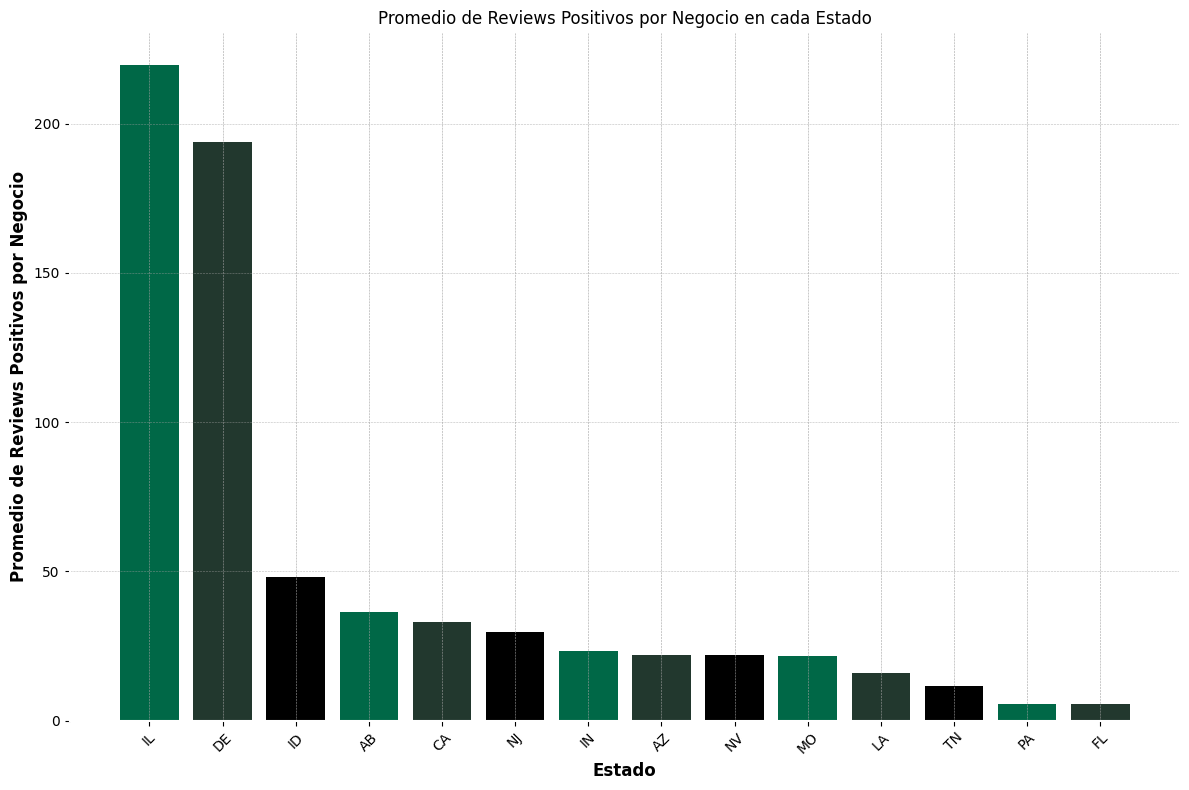

In [36]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_state_avg_positive['state'], df_state_avg_positive['avg_positive_per_business'], color=colors)

# Personalizar el gráfico
plt.title('Promedio de Reviews Positivos por Negocio en cada Estado')
plt.xlabel('Estado')
plt.ylabel('Promedio de Reviews Positivos por Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Aca Observamos los valores absolutos de reviews positivos de Starbucks, podriamos tomar los cinco estados con mayor relación de reviews positivos / numero de locales de dicho estado. Estos serian: Illinois, Delaware, Idaho, California y New Jersey

Este grafico representa los Reviews Positivos Absolutos - Relación para Dunkin

In [37]:
# Cargar los archivos Parquet
df_business = pd.read_parquet('..//data//business_dunkin.parquet')
df_review_sent_total = pd.read_parquet('..//data//review_dunkin_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged = pd.merge(df_business, df_review_sent_total, on='business_id')

# Calcular la cantidad promedio de reviews positivos por negocio en cada estado
df_merged['avg_positive_per_business'] = df_merged['positive_total'] / df_merged.groupby('state')['business_id'].transform('nunique')

# Agrupar por estado y calcular el promedio de reviews positivos
df_state_avg_positive = df_merged.groupby('state')['avg_positive_per_business'].mean().reset_index()

# Ordenar los estados de mayor a menor según el promedio de reviews positivos
df_state_avg_positive = df_state_avg_positive.sort_values(by='avg_positive_per_business', ascending=False)

# Definir los colores para el gráfico
colors = ['#ED5A24', '#DCDCDC', '#E64176']

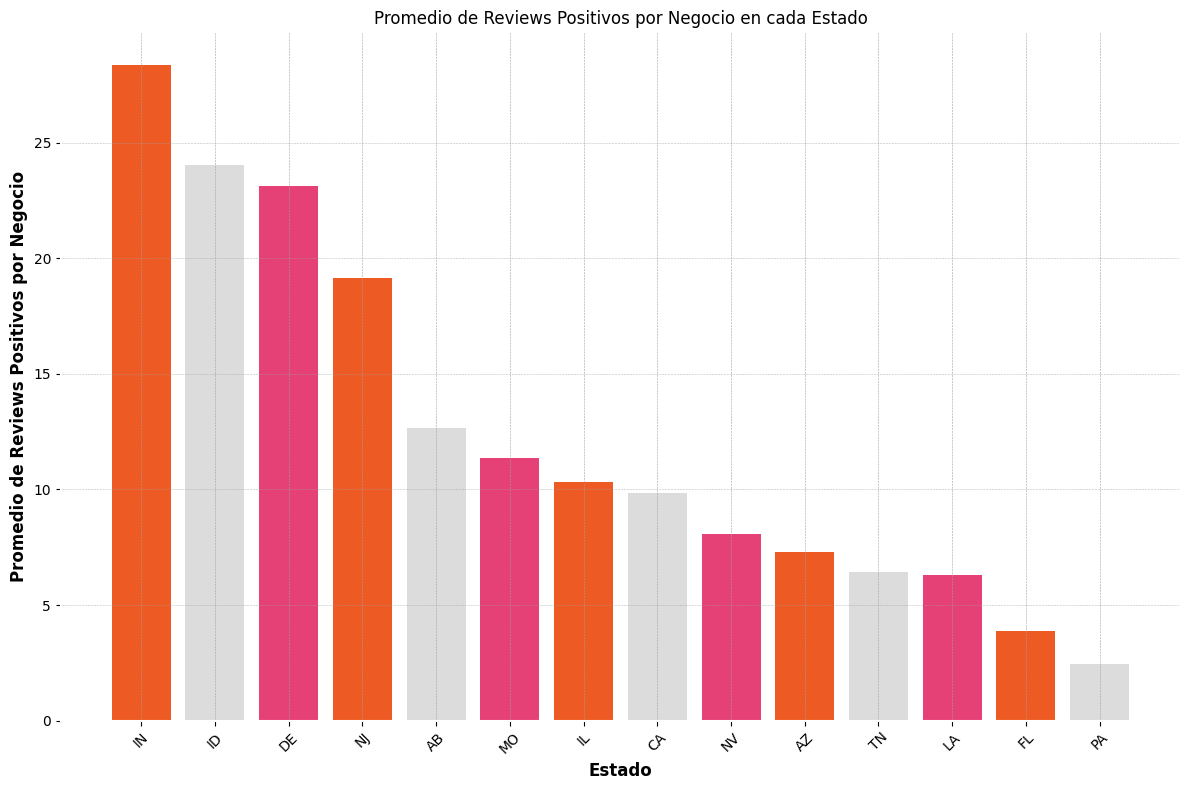

In [38]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_state_avg_positive['state'], df_state_avg_positive['avg_positive_per_business'], color=colors)

# Personalizar el gráfico
plt.title('Promedio de Reviews Positivos por Negocio en cada Estado')
plt.xlabel('Estado')
plt.ylabel('Promedio de Reviews Positivos por Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Los siguientes graficos nos representan, la cantidad de Reviews negativos de un Estado dividido entre el número total de locales en ese mismo Estado

Este grafico representa los Reviews Negativos Absolutos - Relación para Starbucks

In [39]:
# Cargar los archivos Parquet
df_business = pd.read_parquet('..//data//business.parquet')
df_review_sent_total = pd.read_parquet('..//data//review_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged = pd.merge(df_business, df_review_sent_total, on='business_id')

# Calcular la cantidad promedio de reviews negativos por negocio en cada estado
df_merged['avg_negative_per_business'] = df_merged['negative_total'] / df_merged.groupby('state')['business_id'].transform('nunique')

# Agrupar por estado y calcular el promedio de reviews negativos
df_state_avg_negative = df_merged.groupby('state')['avg_negative_per_business'].mean().reset_index()

# Ordenar los estados de mayor a menor según el promedio de reviews negativos
df_state_avg_negative = df_state_avg_negative.sort_values(by='avg_negative_per_business', ascending=False)

# Definir los colores para el gráfico
colors = ['#006847', '#22382E', '#000000']

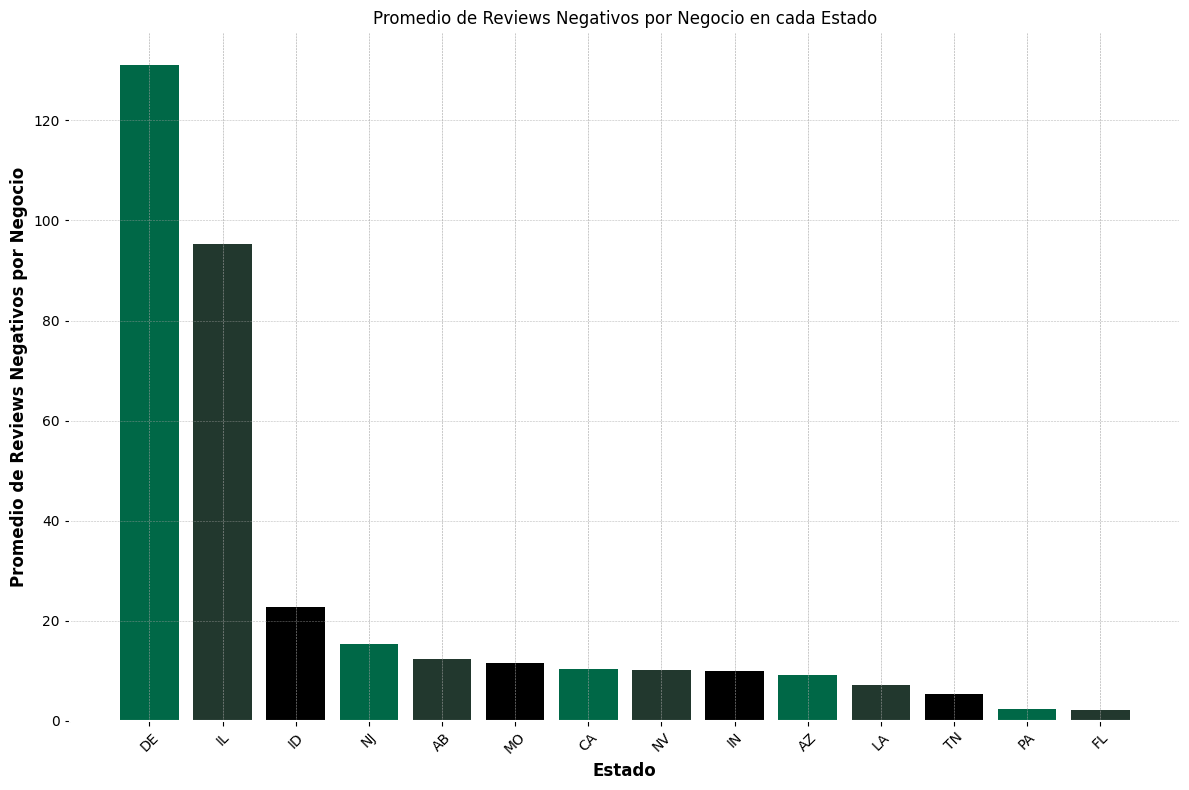

In [40]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_state_avg_negative['state'], df_state_avg_negative['avg_negative_per_business'], color=colors)

# Personalizar el gráfico
plt.title('Promedio de Reviews Negativos por Negocio en cada Estado')
plt.xlabel('Estado')
plt.ylabel('Promedio de Reviews Negativos por Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Aca Observamos los valores absolutos de reviews negativos de Starbucks, podriamos tomar los cinco estados con mayor relación de reviews negativos / numero de locales de dicho estado. Estos serian: Delaware, Illinois, Idaho, New Jersey y Missouri

Este grafico representa los Reviews Negativos Absolutos - Relación para Dunkin

In [41]:
# Cargar los archivos Parquet
df_business = pd.read_parquet('..//data//business_dunkin.parquet')
df_review_sent_total = pd.read_parquet('..//data//review_dunkin_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged = pd.merge(df_business, df_review_sent_total, on='business_id')

# Calcular la cantidad promedio de reviews negativos por negocio en cada estado
df_merged['avg_negative_per_business'] = df_merged['negative_total'] / df_merged.groupby('state')['business_id'].transform('nunique')

# Agrupar por estado y calcular el promedio de reviews negativos
df_state_avg_negative = df_merged.groupby('state')['avg_negative_per_business'].mean().reset_index()

# Ordenar los estados de mayor a menor según el promedio de reviews negativos
df_state_avg_negative = df_state_avg_negative.sort_values(by='avg_negative_per_business', ascending=False)

# Definir los colores para el gráfico
colors = ['#ED5A24', '#DCDCDC', '#E64176']

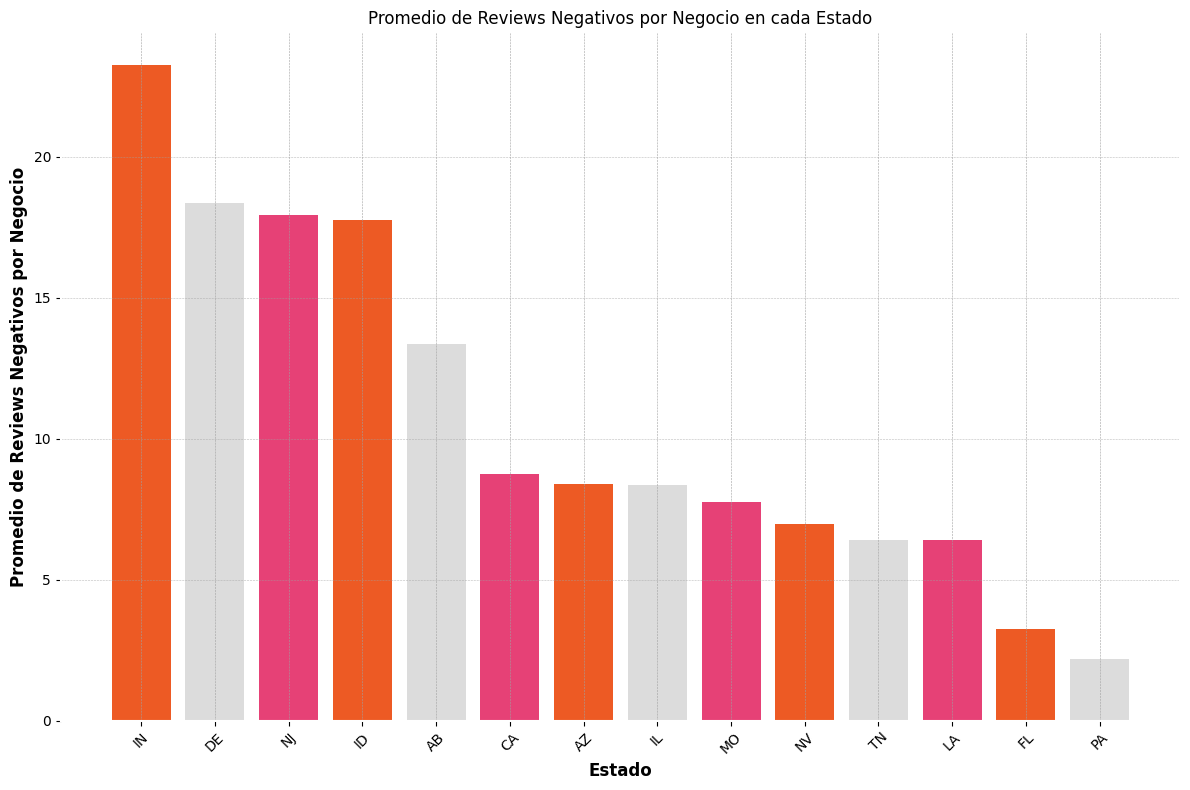

In [42]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_state_avg_negative['state'], df_state_avg_negative['avg_negative_per_business'], color=colors)

# Personalizar el gráfico
plt.title('Promedio de Reviews Negativos por Negocio en cada Estado')
plt.xlabel('Estado')
plt.ylabel('Promedio de Reviews Negativos por Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Hagamos una visualizacion Comparativa (Reviews / cantidad de locales por estado) entre Starbucks y Dunkin

### Relacion de Reviews Positivos entre Starbucks y Dunkin

In [2]:
# Cargar los archivos Parquet
df_business_general = pd.read_parquet('../data/business.parquet')
df_review_sent_total_general = pd.read_parquet('../data/review_sent_total.parquet')
df_business_dunkin = pd.read_parquet('../data/business_dunkin.parquet')
df_review_sent_total_dunkin = pd.read_parquet('../data/review_dunkin_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged_general = pd.merge(df_business_general, df_review_sent_total_general, on='business_id')
df_merged_dunkin = pd.merge(df_business_dunkin, df_review_sent_total_dunkin, on='business_id')

# Calcular la cantidad promedio de reviews positivos por negocio en cada estado
df_merged_general['avg_positive_per_business'] = df_merged_general['positive_total'] / df_merged_general.groupby('state')['business_id'].transform('nunique')
df_merged_dunkin['avg_positive_per_business'] = df_merged_dunkin['positive_total'] / df_merged_dunkin.groupby('state')['business_id'].transform('nunique')

# Agrupar por estado y calcular el promedio de reviews positivos
df_state_avg_positive_general = df_merged_general.groupby('state')['avg_positive_per_business'].mean().reset_index()
df_state_avg_positive_dunkin = df_merged_dunkin.groupby('state')['avg_positive_per_business'].mean().reset_index()

# Filtrar solo los estados deseados
states = ['IL', 'DE', 'ID', 'CA', 'NJ']
df_state_avg_positive_general = df_state_avg_positive_general[df_state_avg_positive_general['state'].isin(states)]
df_state_avg_positive_dunkin = df_state_avg_positive_dunkin[df_state_avg_positive_dunkin['state'].isin(states)]

# Ordenar los DataFrames por estado
df_state_avg_positive_general = df_state_avg_positive_general.set_index('state').loc[states].reset_index()
df_state_avg_positive_dunkin = df_state_avg_positive_dunkin.set_index('state').loc[states].reset_index()

# Definir los colores para el gráfico
colors_general = ['#006847', '#22382E', '#000000']
colors_dunkin = ['#ED5A24', '#DCDCDC', '#E64176']

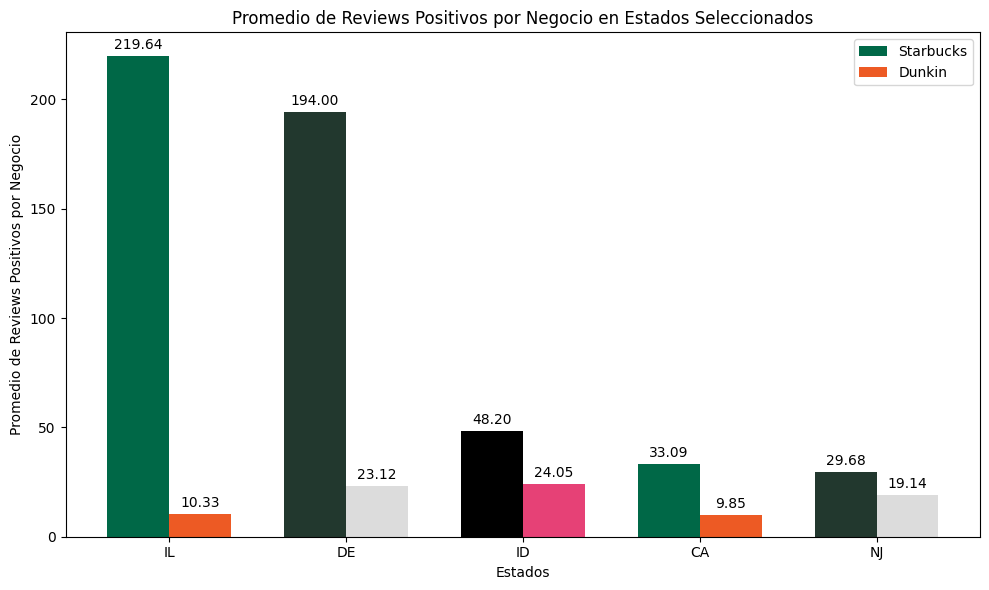

In [4]:
# Crear el gráfico de barras agrupadas
x = np.arange(len(states))  # Etiquetas de los estados
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

bars_general = ax.bar(x - width/2, df_state_avg_positive_general['avg_positive_per_business'], width, label='Starbucks', color=colors_general)
bars_dunkin = ax.bar(x + width/2, df_state_avg_positive_dunkin['avg_positive_per_business'], width, label='Dunkin', color=colors_dunkin)

# Añadir etiquetas y títulos
ax.set_xlabel('Estados')
ax.set_ylabel('Promedio de Reviews Positivos por Negocio')
ax.set_title('Promedio de Reviews Positivos por Negocio en Estados Seleccionados')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.legend()

# Añadir etiquetas de datos
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de almohadilla vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_general)
add_labels(bars_dunkin)

plt.tight_layout()
plt.show()

### Relacion de Reviews Negativos entre Starbucks y Dunkin

In [8]:
# Cargar los archivos Parquet
df_business_general = pd.read_parquet('../data/business.parquet')
df_review_sent_total_general = pd.read_parquet('../data/review_sent_total.parquet')
df_business_dunkin = pd.read_parquet('../data/business_dunkin.parquet')
df_review_sent_total_dunkin = pd.read_parquet('../data/review_dunkin_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged_general = pd.merge(df_business_general, df_review_sent_total_general, on='business_id')
df_merged_dunkin = pd.merge(df_business_dunkin, df_review_sent_total_dunkin, on='business_id')

# Calcular la cantidad promedio de reviews positivos por negocio en cada estado
df_merged_general['avg_negative_per_business'] = df_merged_general['negative_total'] / df_merged_general.groupby('state')['business_id'].transform('nunique')
df_merged_dunkin['avg_negative_per_business'] = df_merged_dunkin['negative_total'] / df_merged_dunkin.groupby('state')['business_id'].transform('nunique')

# Agrupar por estado y calcular el promedio de reviews positivos
df_state_avg_negative_general = df_merged_general.groupby('state')['avg_negative_per_business'].mean().reset_index()
df_state_avg_negative_dunkin = df_merged_dunkin.groupby('state')['avg_negative_per_business'].mean().reset_index()

# Filtrar solo los estados deseados
states = ['DE', 'IL', 'ID', 'NJ', 'MO']
df_state_avg_negative_general = df_state_avg_negative_general[df_state_avg_negative_general['state'].isin(states)]
df_state_avg_negative_dunkin = df_state_avg_negative_dunkin[df_state_avg_negative_dunkin['state'].isin(states)]

# Ordenar los DataFrames por estado
df_state_avg_negative_general = df_state_avg_negative_general.set_index('state').loc[states].reset_index()
df_state_avg_negative_dunkin = df_state_avg_negative_dunkin.set_index('state').loc[states].reset_index()

# Definir los colores para el gráfico
colors_general = ['#006847', '#22382E', '#000000']
colors_dunkin = ['#ED5A24', '#DCDCDC', '#E64176']

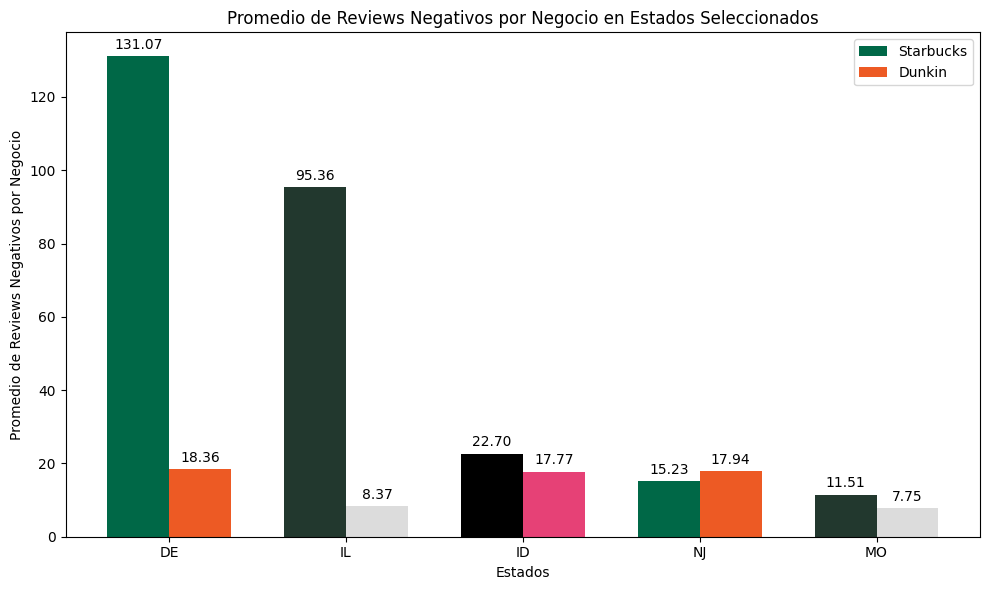

In [9]:
# Crear el gráfico de barras agrupadas
x = np.arange(len(states))  # Etiquetas de los estados
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

bars_general = ax.bar(x - width/2, df_state_avg_negative_general['avg_negative_per_business'], width, label='Starbucks', color=colors_general)
bars_dunkin = ax.bar(x + width/2, df_state_avg_negative_dunkin['avg_negative_per_business'], width, label='Dunkin', color=colors_dunkin)

# Añadir etiquetas y títulos
ax.set_xlabel('Estados')
ax.set_ylabel('Promedio de Reviews Negativos por Negocio')
ax.set_title('Promedio de Reviews Negativos por Negocio en Estados Seleccionados')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.legend()

# Añadir etiquetas de datos
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de almohadilla vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_general)
add_labels(bars_dunkin)

plt.tight_layout()
plt.show()

# Hagamos una visualizacion de dispersion de porcentajes de reviews en el pais para Starbucks

### Visualización de reviews Positivos %

In [51]:
# Cargar los archivos Parquet
df_business_general = pd.read_parquet('../data/business.parquet')
df_review_sent_total = pd.read_parquet('../data/review_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged = pd.merge(df_business_general, df_review_sent_total, on='business_id')

# Filtrar los estados deseados
states = ['IL', 'DE', 'ID', 'CA', 'NJ']
df_merged = df_merged[df_merged['state'].isin(states)]

# Calcular la frecuencia de reviews positivos por estado
df_grouped = df_merged.groupby('state')['positive'].value_counts().reset_index(name='frequency')


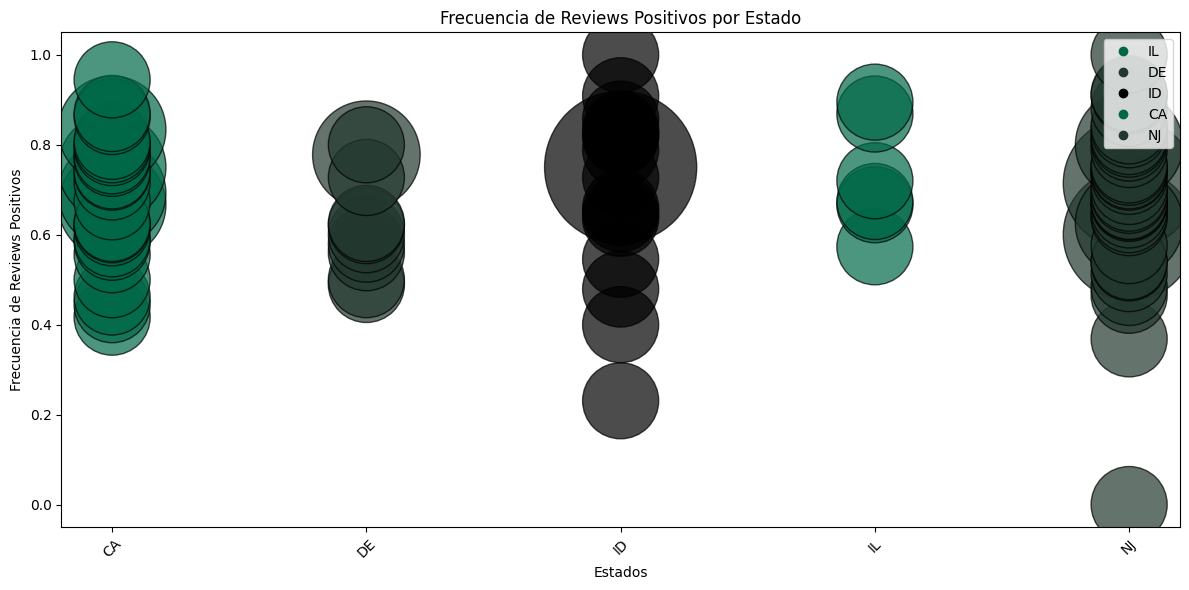

In [53]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))

# Definir los colores y tamaños de los puntos
colors = {'IL': '#006847', 'DE': '#22382E', 'ID': '#000000', 'CA': '#006847', 'NJ': '#22382E'}
sizes = df_grouped['frequency'].values * 3000

# Graficar los puntos (burbujas)
plt.scatter(
    df_grouped['state'],          # Eje X: estados
    df_grouped['positive'],       # Eje Y: frecuencia de reviews positivos
    s=sizes,                      # Tamaño de los puntos según la frecuencia
    c=df_grouped['state'].map(colors),  # Color de los puntos según el estado
    alpha=0.7,                    # Transparencia de los puntos
    edgecolors='black'            # Color del borde de los puntos
)

# Configurar etiquetas y título
plt.xlabel('Estados')
plt.ylabel('Frecuencia de Reviews Positivos')
plt.title('Frecuencia de Reviews Positivos por Estado')

# Añadir leyenda personalizada
legend_labels = ['IL', 'DE', 'ID', 'CA', 'NJ']
legend_markers = [plt.Line2D([0,0],[0,0],color=colors[state], marker='o', linestyle='') for state in states]
plt.legend(legend_markers, legend_labels, loc='upper right')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización
plt.tight_layout()
plt.show()

### Visualización de reviews Negativos %

In [54]:
# Cargar los archivos Parquet
df_business_general = pd.read_parquet('../data/business.parquet')
df_review_sent_total = pd.read_parquet('../data/review_sent_total.parquet')

# Unir los DataFrames por la columna business_id
df_merged = pd.merge(df_business_general, df_review_sent_total, on='business_id')

# Filtrar los estados deseados
states = ['DE', 'IL', 'ID', 'NJ', 'MO']
df_merged = df_merged[df_merged['state'].isin(states)]

# Calcular la frecuencia de reviews positivos por estado
df_grouped = df_merged.groupby('state')['negative'].value_counts().reset_index(name='frequency')

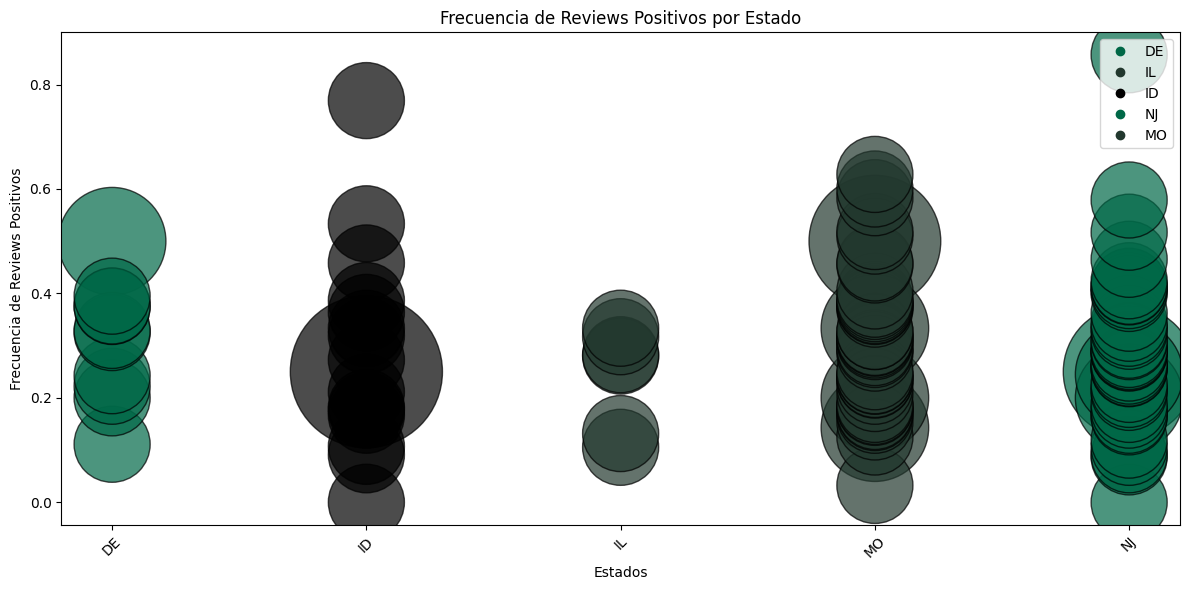

In [55]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))

# Definir los colores y tamaños de los puntos
colors = {'DE': '#006847', 'IL': '#22382E', 'ID': '#000000', 'NJ': '#006847', 'MO': '#22382E'}
sizes = df_grouped['frequency'].values * 3000

# Graficar los puntos (burbujas)
plt.scatter(
    df_grouped['state'],          # Eje X: estados
    df_grouped['negative'],       # Eje Y: frecuencia de reviews positivos
    s=sizes,                      # Tamaño de los puntos según la frecuencia
    c=df_grouped['state'].map(colors),  # Color de los puntos según el estado
    alpha=0.7,                    # Transparencia de los puntos
    edgecolors='black'            # Color del borde de los puntos
)

# Configurar etiquetas y título
plt.xlabel('Estados')
plt.ylabel('Frecuencia de Reviews Positivos')
plt.title('Frecuencia de Reviews Positivos por Estado')

# Añadir leyenda personalizada
legend_labels = ['DE', 'IL', 'ID', 'NJ', 'MO']
legend_markers = [plt.Line2D([0,0],[0,0],color=colors[state], marker='o', linestyle='') for state in states]
plt.legend(legend_markers, legend_labels, loc='upper right')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización
plt.tight_layout()
plt.show()